# Random Forest Classification

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load sample dataset
df = sns.load_dataset('Iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Selection of features and responce variable
X = df.iloc[:,0:4]
y = df.iloc[:,-1:]
print(X.head(3)) 
print(y.head(3))

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
  species
0  setosa
1  setosa
2  setosa


In [8]:
# import Random Forest model from sklearn library
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)
model.predict([[2.7, 5.6, 3.4, 1.2]])

C:\Users\scs\AppData\Local\Temp/ipykernel_13860/1596073073.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)
C:\Users\scs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

In [9]:
# splitting data for checking model accuracy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# predictions
predictions = model.predict(X_test)
predictions

array(['virginica', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [12]:
# accuracy test
score = model.score(X_test, y_test)
print("The Accuracy Score is: ", score)

The Accuracy Score is:  1.0


In [13]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, predictions))

Accuracy: 1.0


In [14]:
# checking accuracy with confusion metrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[ 7,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 15]], dtype=int64)

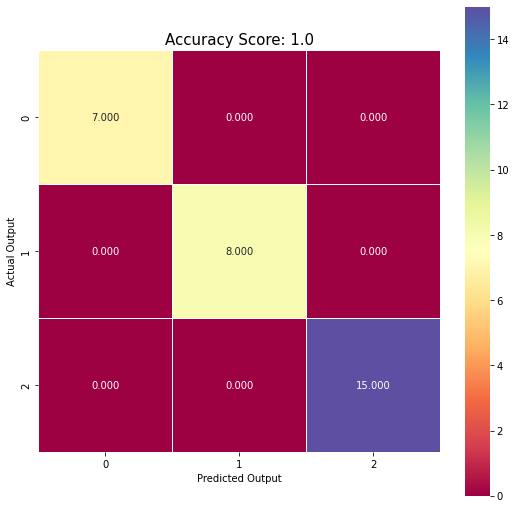

In [18]:
# checking accuracy with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap='Spectral');
plt.ylabel('Actual Output');
plt.xlabel('Predicted Output');
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size=15);